# 13. Supplementary Figure 3

This notebook is used to create the panels of Supplementary Figure 3.

Before starting, use 1.Preprocessing notebook to generate:
- SC4_normalized.h5ad - Normalized single-cell data

In [1]:
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import scanpy as sc
from anndata import read_h5ad
import numpy as np

import sys
sys.path.insert(0, '../functions/')
import pl
import utils

### Set plot style

In [2]:
%matplotlib inline
%config InlineBackend.figure_formats=['retina']
sns.set(rc={'figure.figsize':(5, 5),
            'legend.frameon':False},
        style='ticks',
        context='talk')

# Render figures with higher resolution.
plt.rcParams['figure.dpi']=200
# Save with transparent regions white background.
plt.rcParams['savefig.facecolor']='white'

### Set color palette

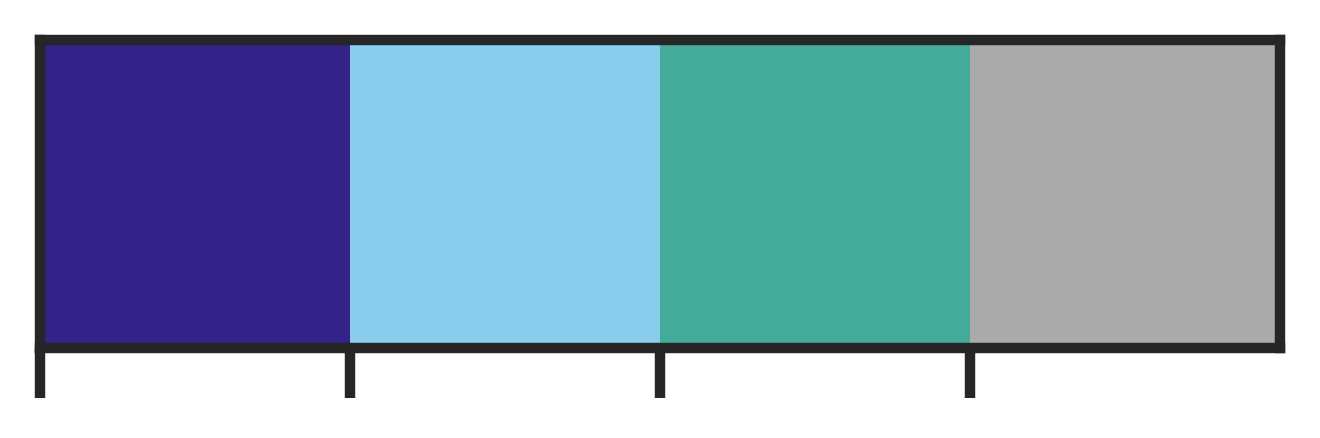

In [3]:
#color palette
palette = [(51,34,136),(136,204,238),(68,170,153),(170,170,170)]
palette = [(e[0]/255.0, e[1]/255.0, e[2]/255.0) for e in palette]
cmap = ListedColormap(palette)
sns.color_palette(palette=None,as_cmap=True)
sns.palplot(palette)

## Panel A

### Set paths

In [4]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC4_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_3'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [5]:
adata =  sc.read_h5ad(anndata_path)

/Users/jeanydelafiori/Apps/miniconda3/envs/spacem_analysis/lib/python3.12/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


### Histogram

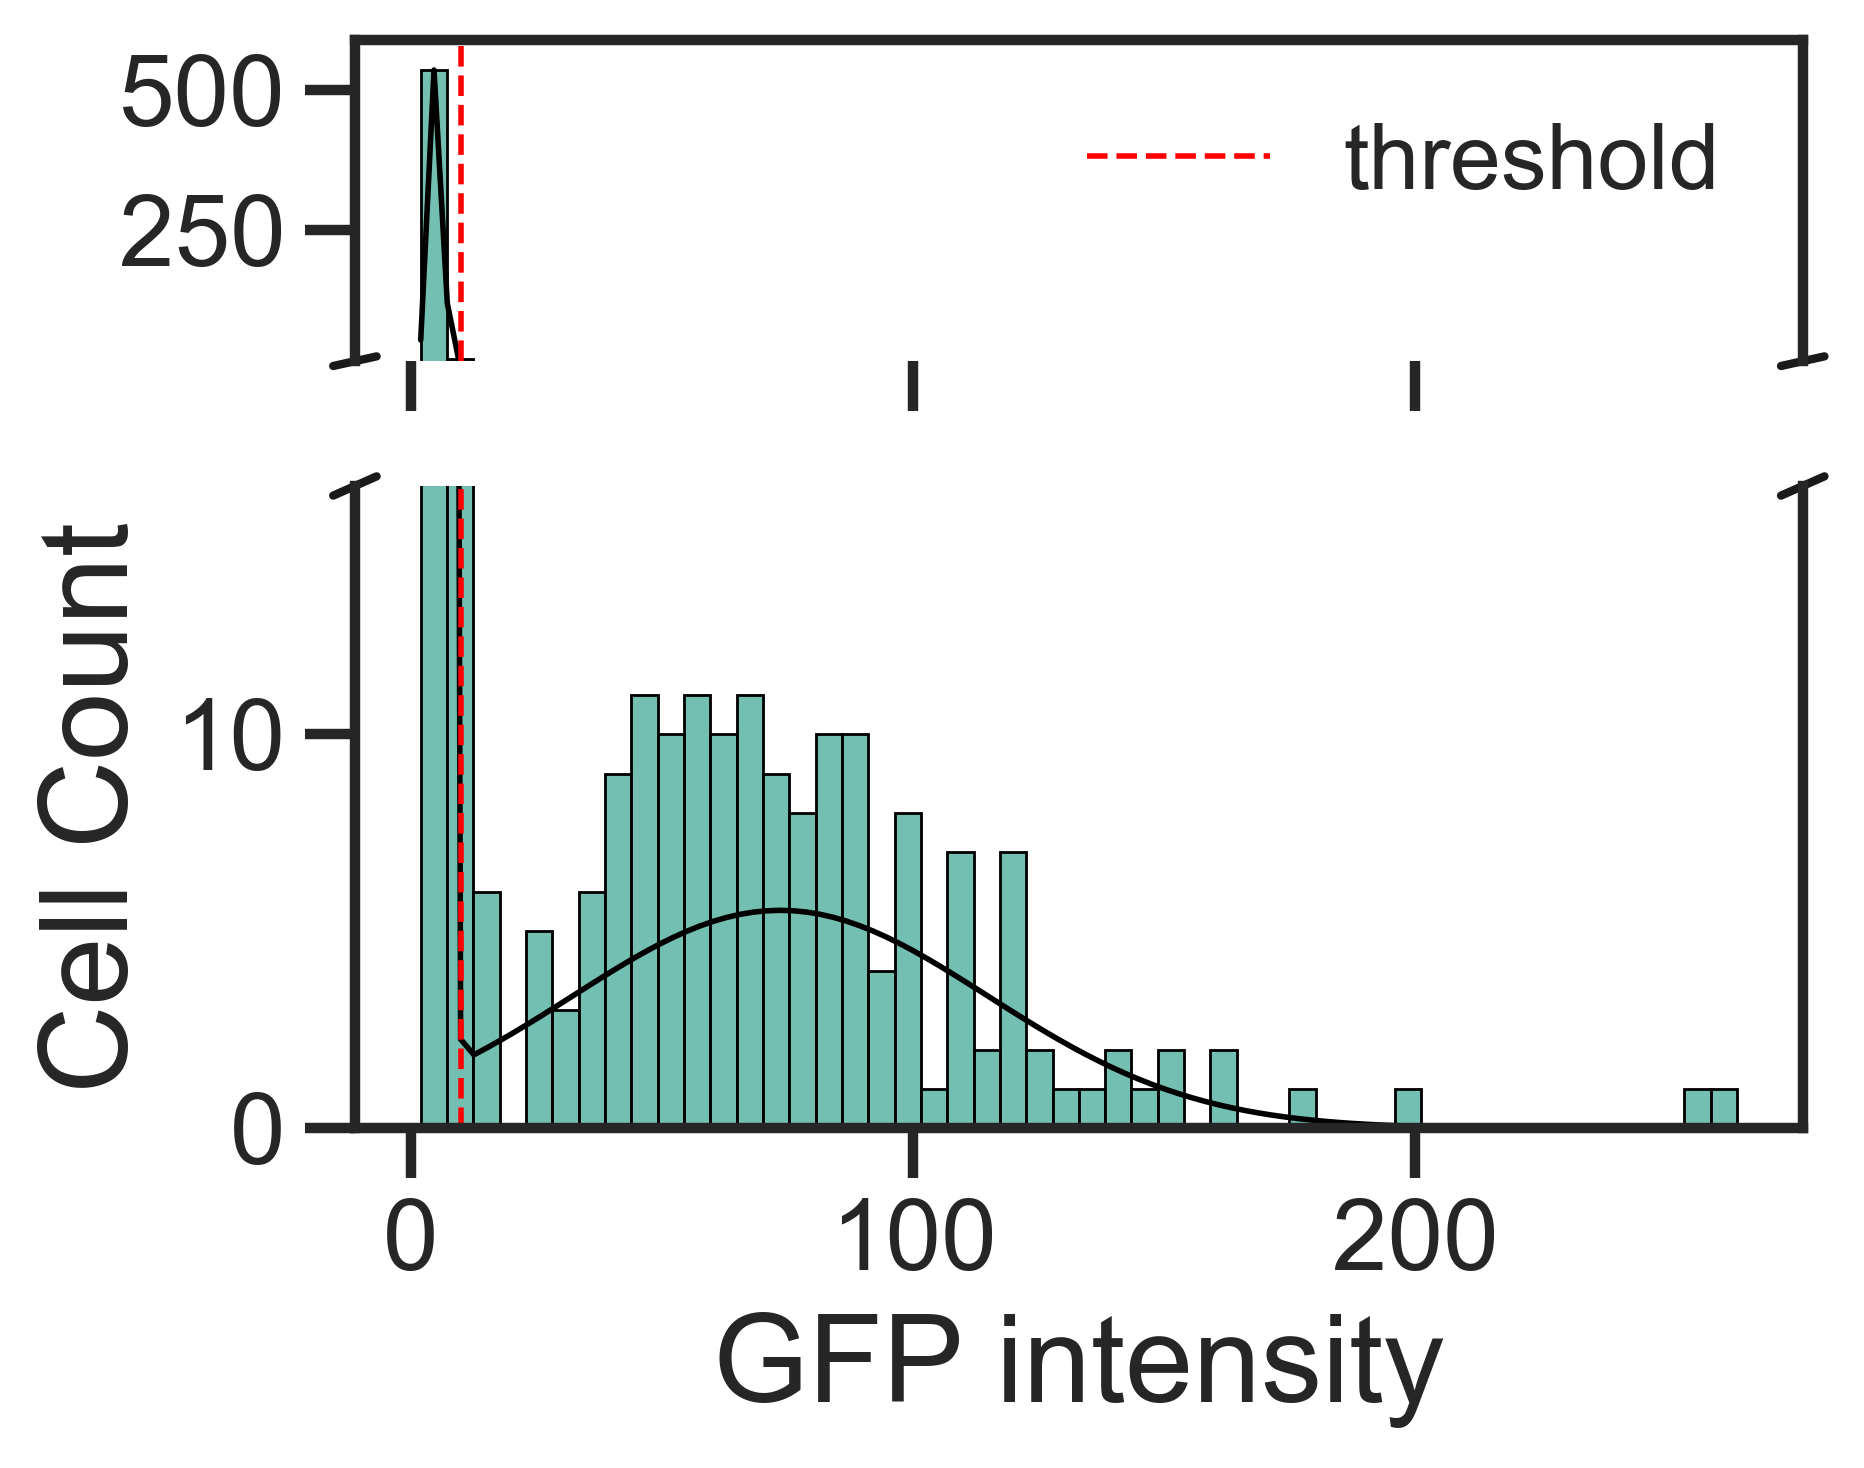

In [6]:
adata_1 = adata[adata.obs['well'] == 'well1', :]
fig = pl.histogram(adata=adata_1, column = 'sampled_intensity_max-GFP', 
                   resolution=100, bins=50, color=palette[2], limit=97, 
                   size_x=5, size_y=4, x_label='GFP intensity', threshold=10)

fig.savefig(plots_path / 'panel_A_rep1.png', bbox_inches='tight')
fig.savefig(plots_path / 'panel_A_rep1.svg', bbox_inches='tight')

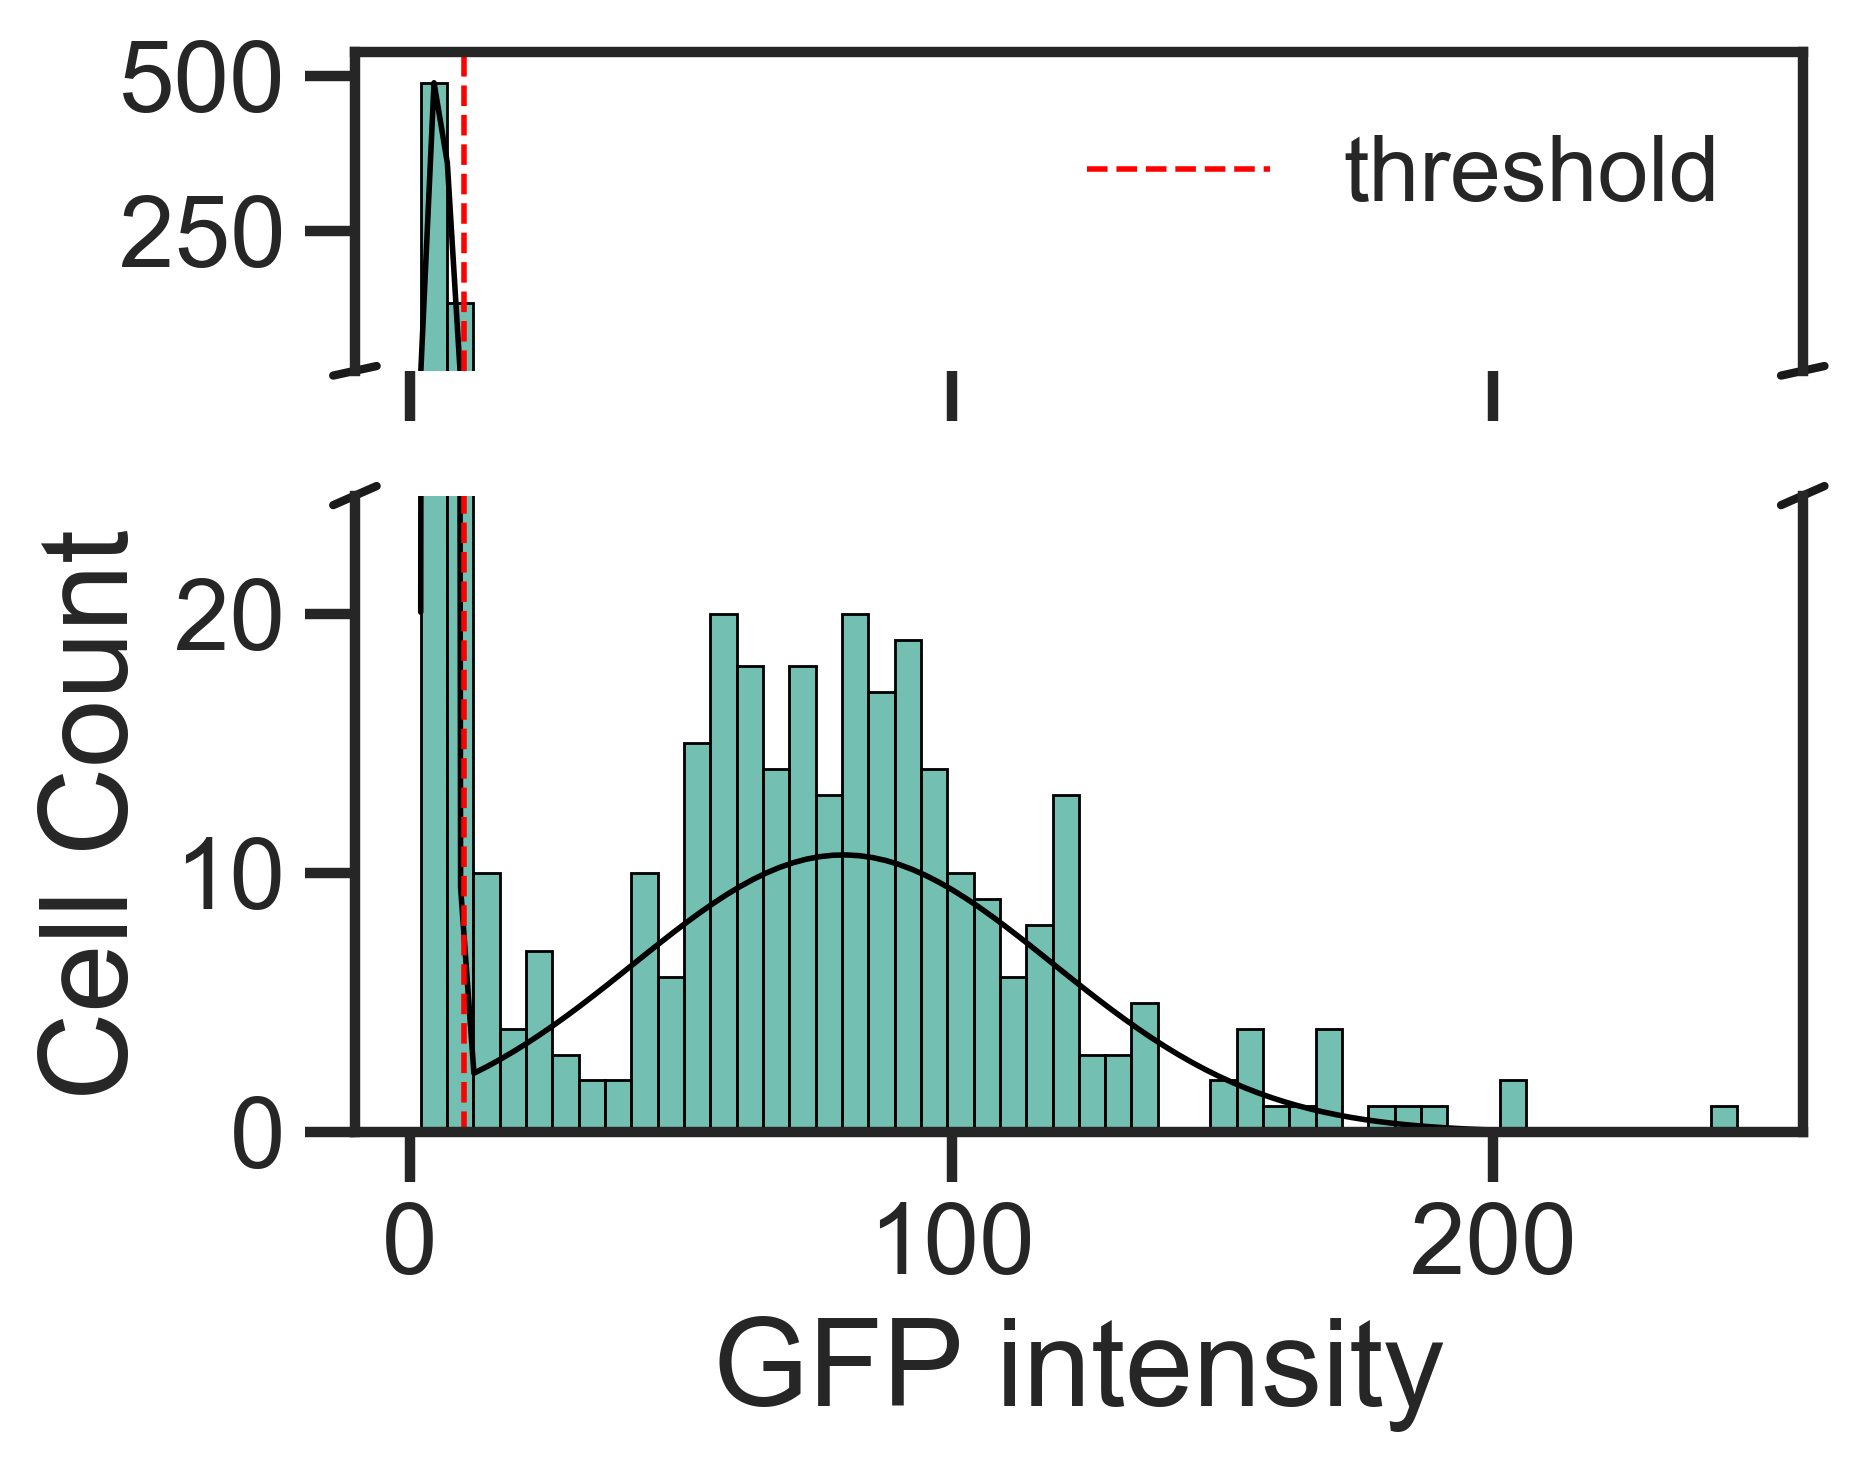

In [7]:
adata_2 = adata[adata.obs['well'] == 'well2', :]
fig = pl.histogram(adata=adata_2, column = 'sampled_intensity_max-GFP', 
                   resolution=100, bins=50, color=palette[2], limit=96, 
                   size_x=5, size_y=4, x_label='GFP intensity', threshold=10)

fig.savefig(plots_path / 'panel_A_rep2.png', bbox_inches='tight')
fig.savefig(plots_path / 'panel_A_rep2.svg', bbox_inches='tight')

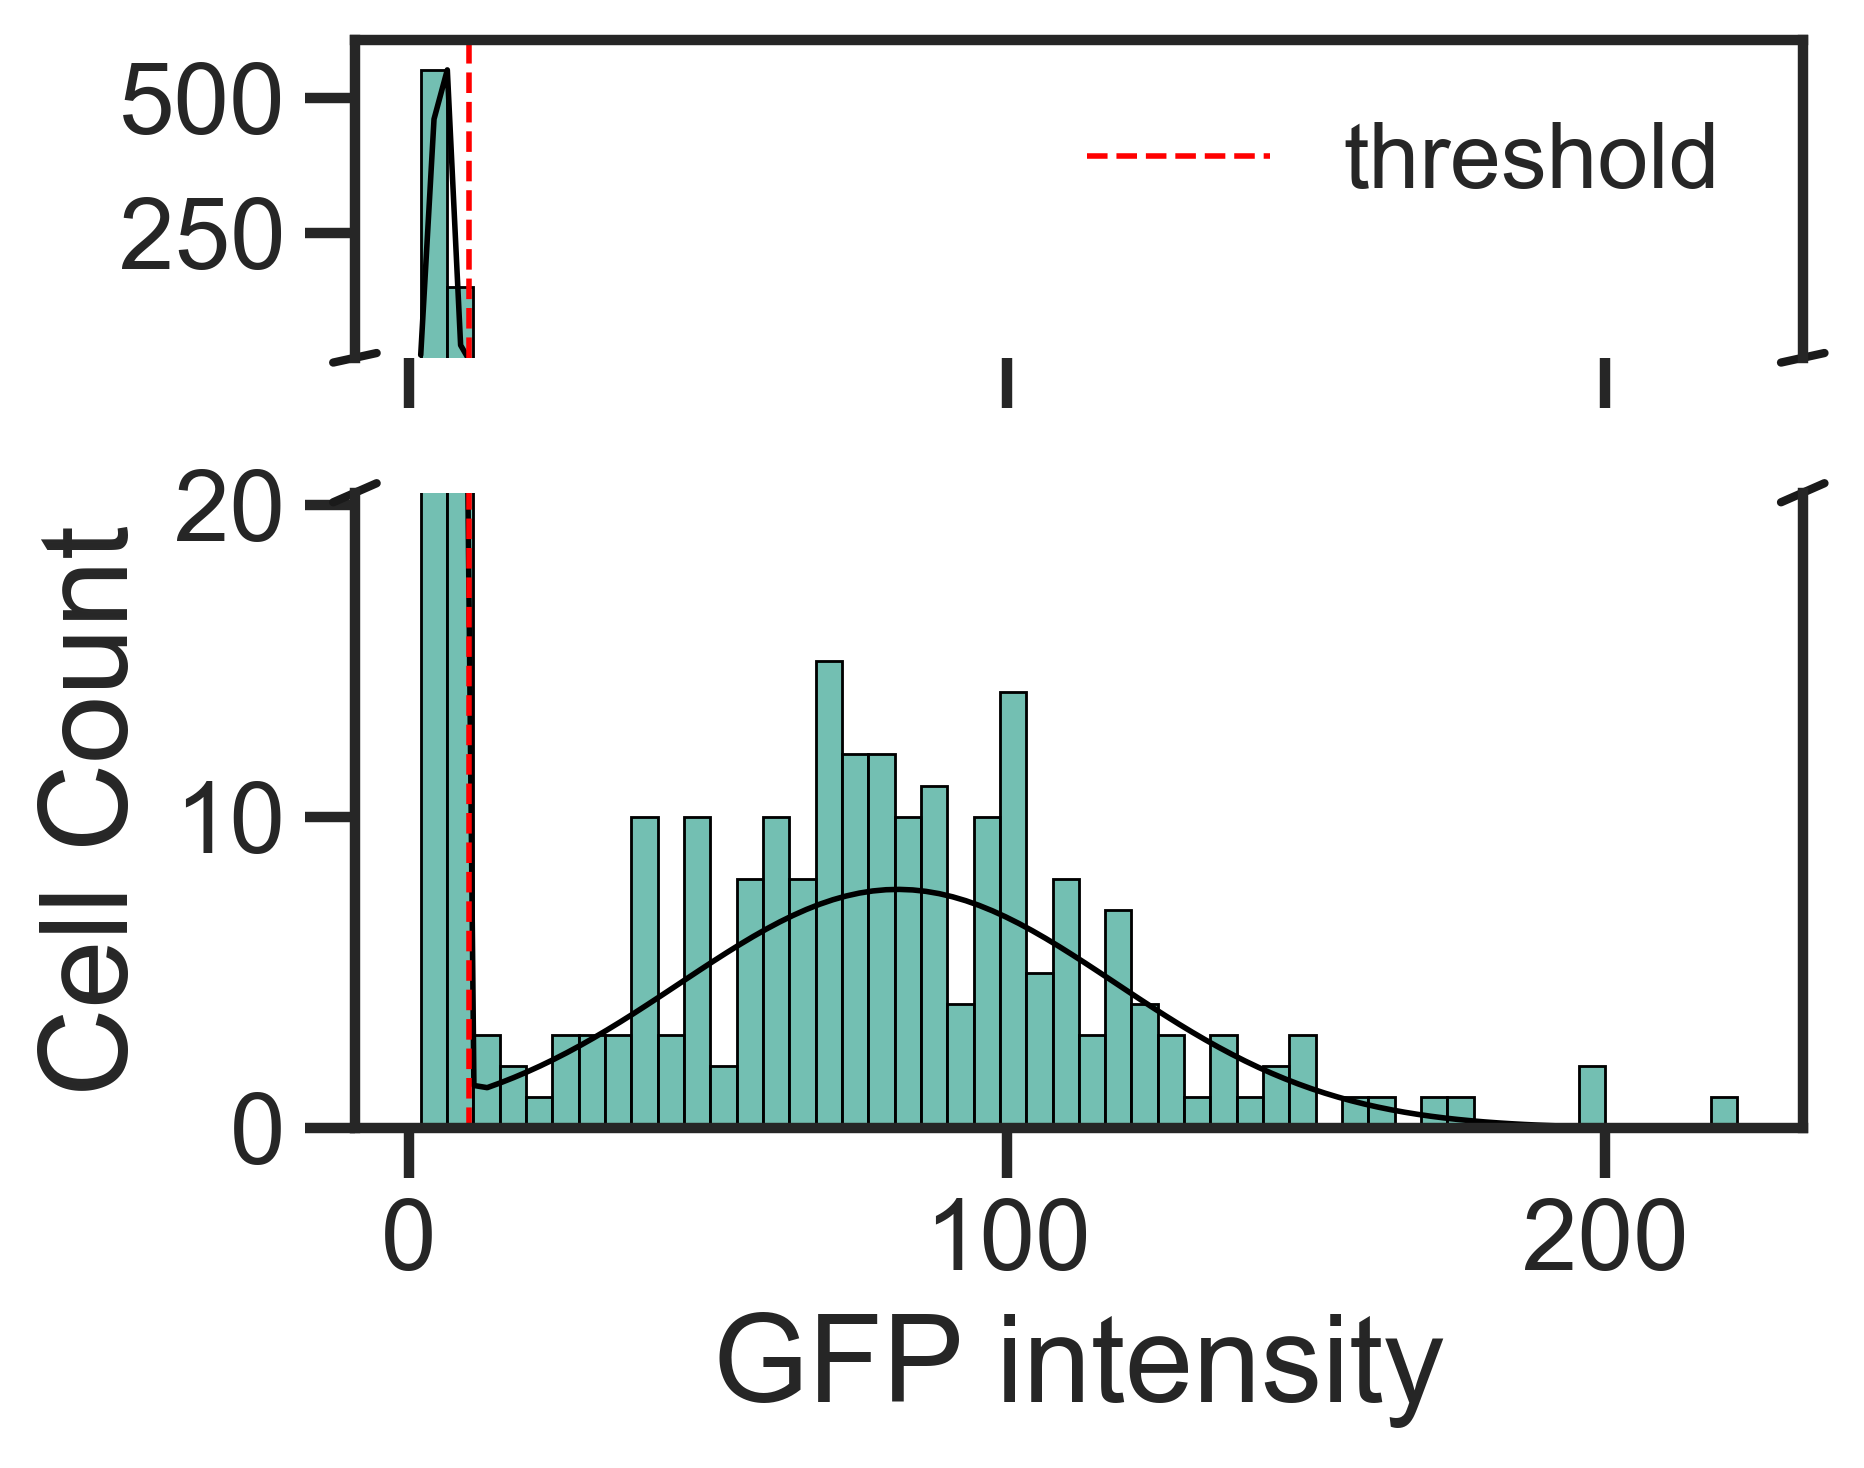

In [8]:
adata_3 = adata[adata.obs['well'] == 'well3', :]
fig = pl.histogram(adata=adata_3, column = 'sampled_intensity_max-GFP', 
                   resolution=100, bins=50, color=palette[2], limit=96, 
                   size_x=5, size_y=4, x_label='GFP intensity', threshold=10)

fig.savefig(plots_path / 'panel_A_rep3.png', bbox_inches='tight')
fig.savefig(plots_path / 'panel_A_rep3.svg', bbox_inches='tight')

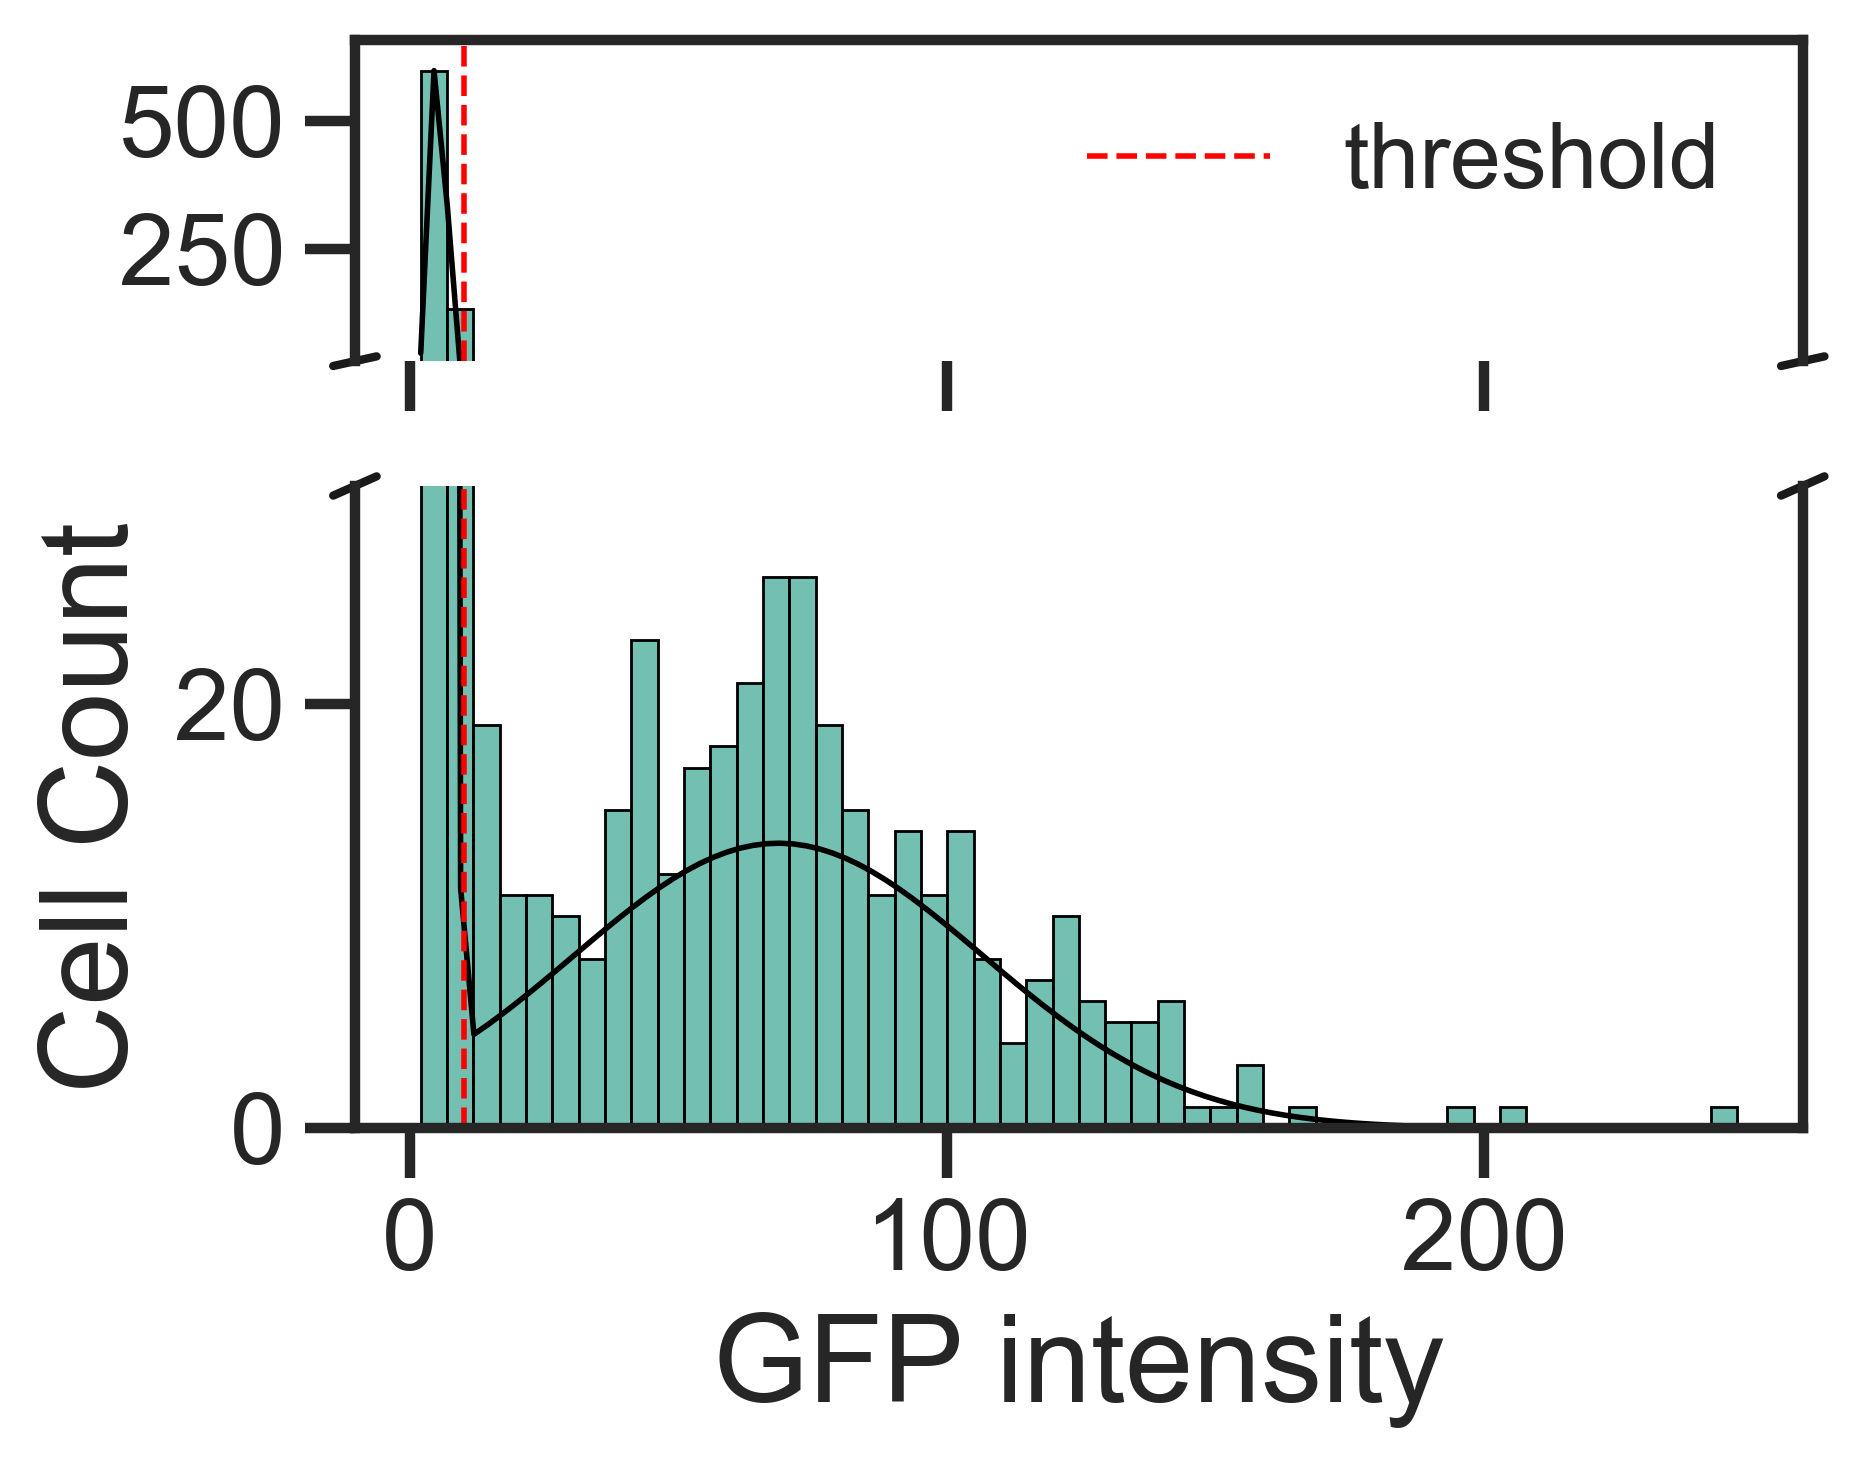

In [9]:
adata_4 = adata[adata.obs['well'] == 'well4', :]
fig = pl.histogram(adata=adata_4, column = 'sampled_intensity_max-GFP', 
                   resolution=100, bins=50, color=palette[2], limit=96, 
                   size_x=5, size_y=4, x_label='GFP intensity', threshold=10)

fig.savefig(plots_path / 'panel_A_rep4.png', bbox_inches='tight')
fig.savefig(plots_path / 'panel_A_rep4.svg', bbox_inches='tight')

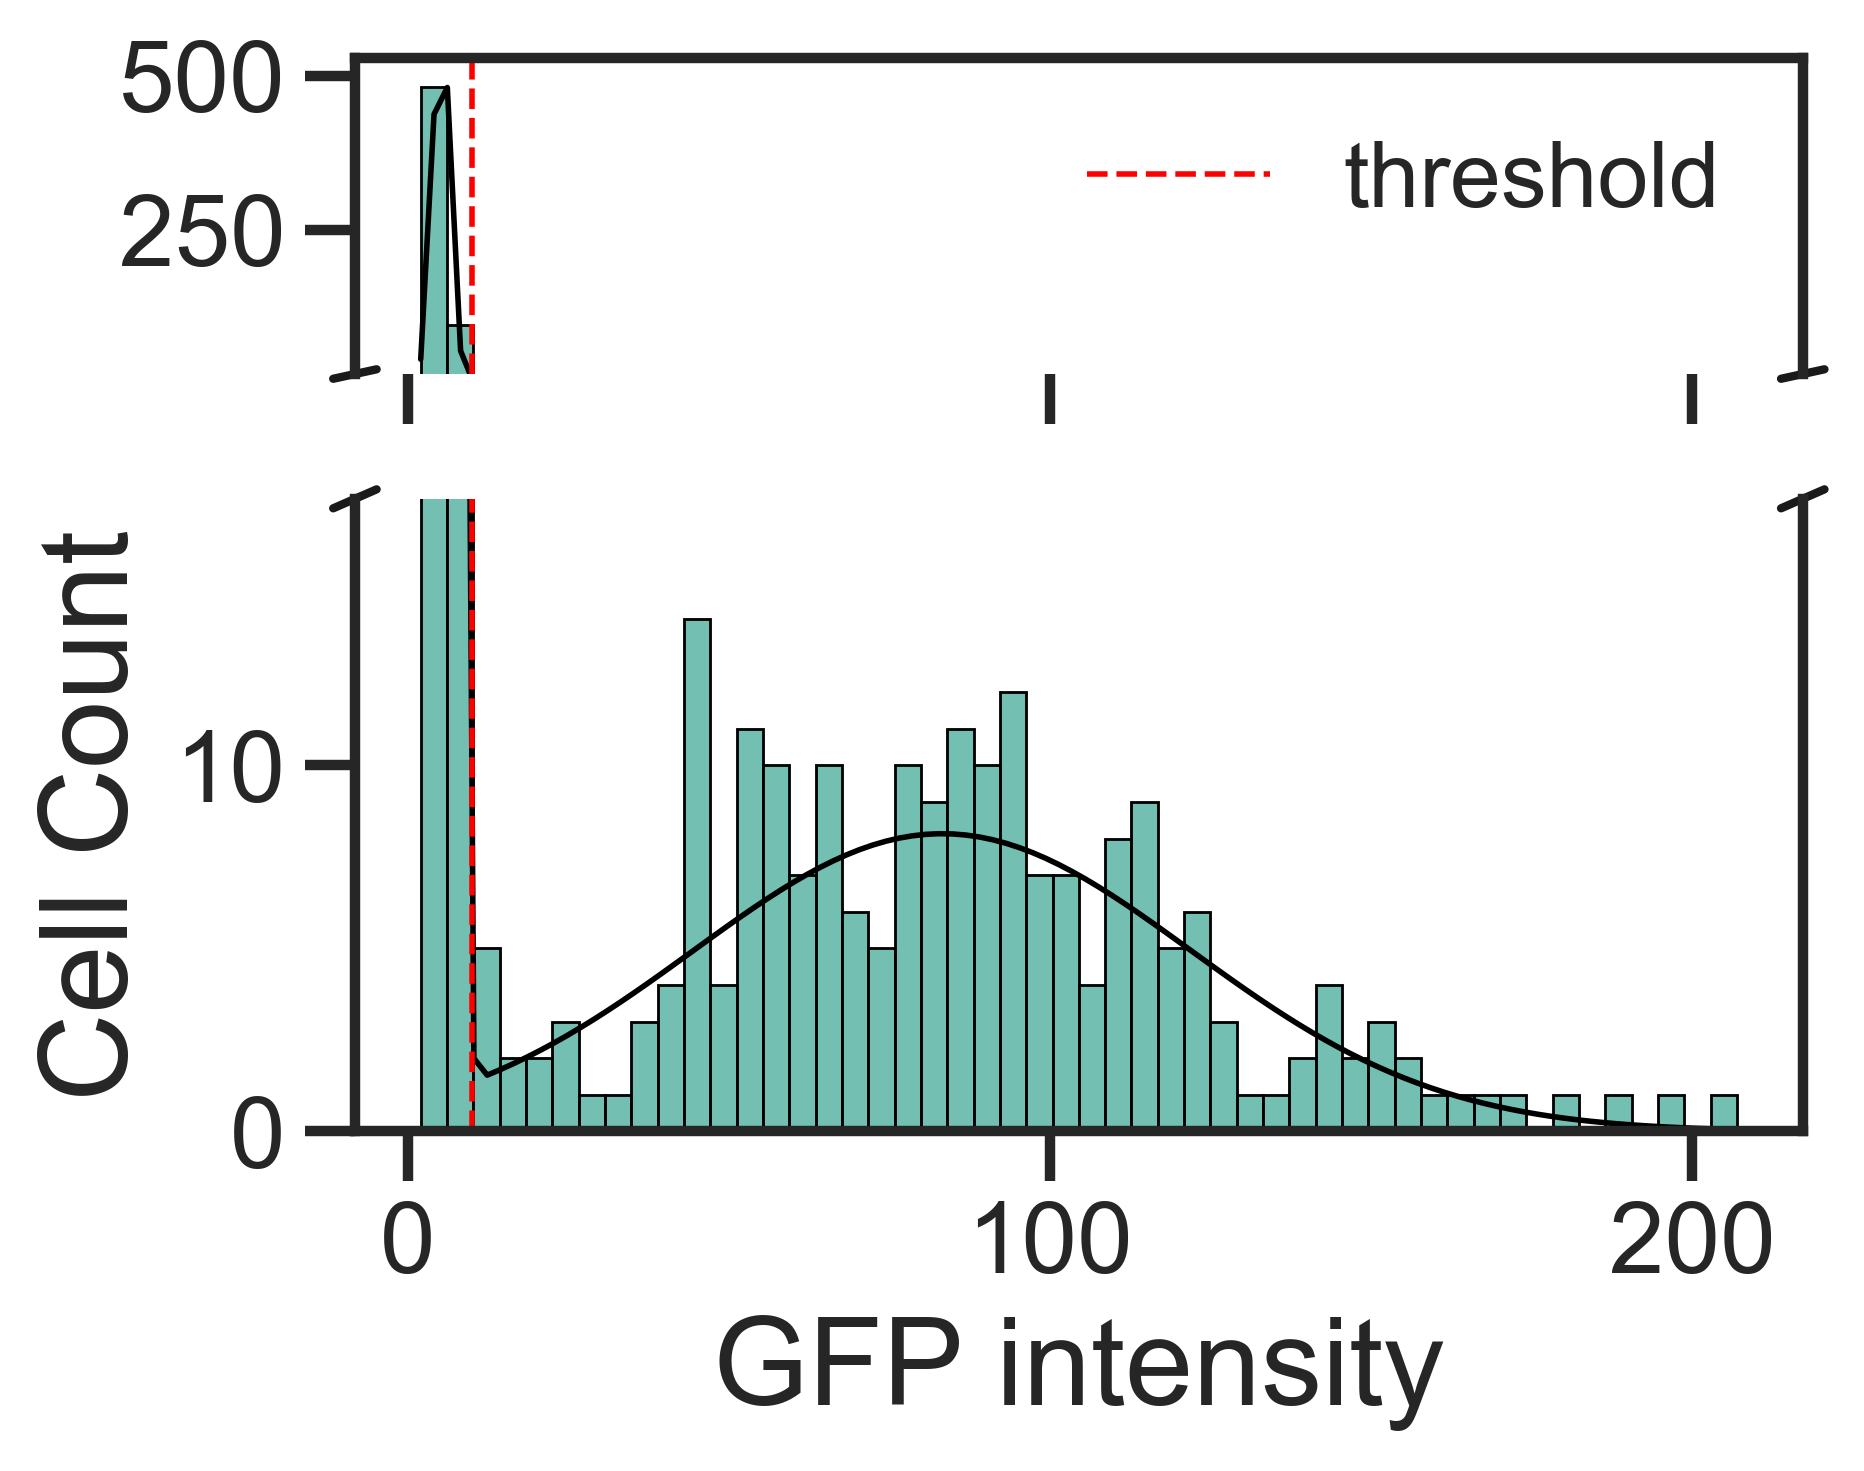

In [10]:
adata_5 = adata[adata.obs['well'] == 'well5', :]
fig = pl.histogram(adata=adata_5, column = 'sampled_intensity_max-GFP', 
                   resolution=100, bins=50, color=palette[2], limit=96, 
                   size_x=5, size_y=4, x_label='GFP intensity', threshold=10)

fig.savefig(plots_path / 'panel_A_rep5.png', bbox_inches='tight')
fig.savefig(plots_path / 'panel_A_rep5.svg', bbox_inches='tight')

## Panel B

### Set paths

In [11]:
#input
data_dir = Path(r'../data')
anndata_path = data_dir / 'SC4_normalized.h5ad'

#output
plots_path =  Path(r'../') / 'figures' / 'supplementary_figure_3'
plots_path.mkdir(parents=True, exist_ok=True)
sc.settings.figdir = plots_path

### Load data

In [12]:
#load anndata file
adata =  sc.read_h5ad(anndata_path)

/Users/jeanydelafiori/Apps/miniconda3/envs/spacem_analysis/lib/python3.12/site-packages/anndata/_core/anndata.py:1754: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [13]:
#getting co-cultured cells size
adata.obs['cell_area_um2'] = adata.obs['cell_area'] * (0.64**2) #pixel size

### Violin

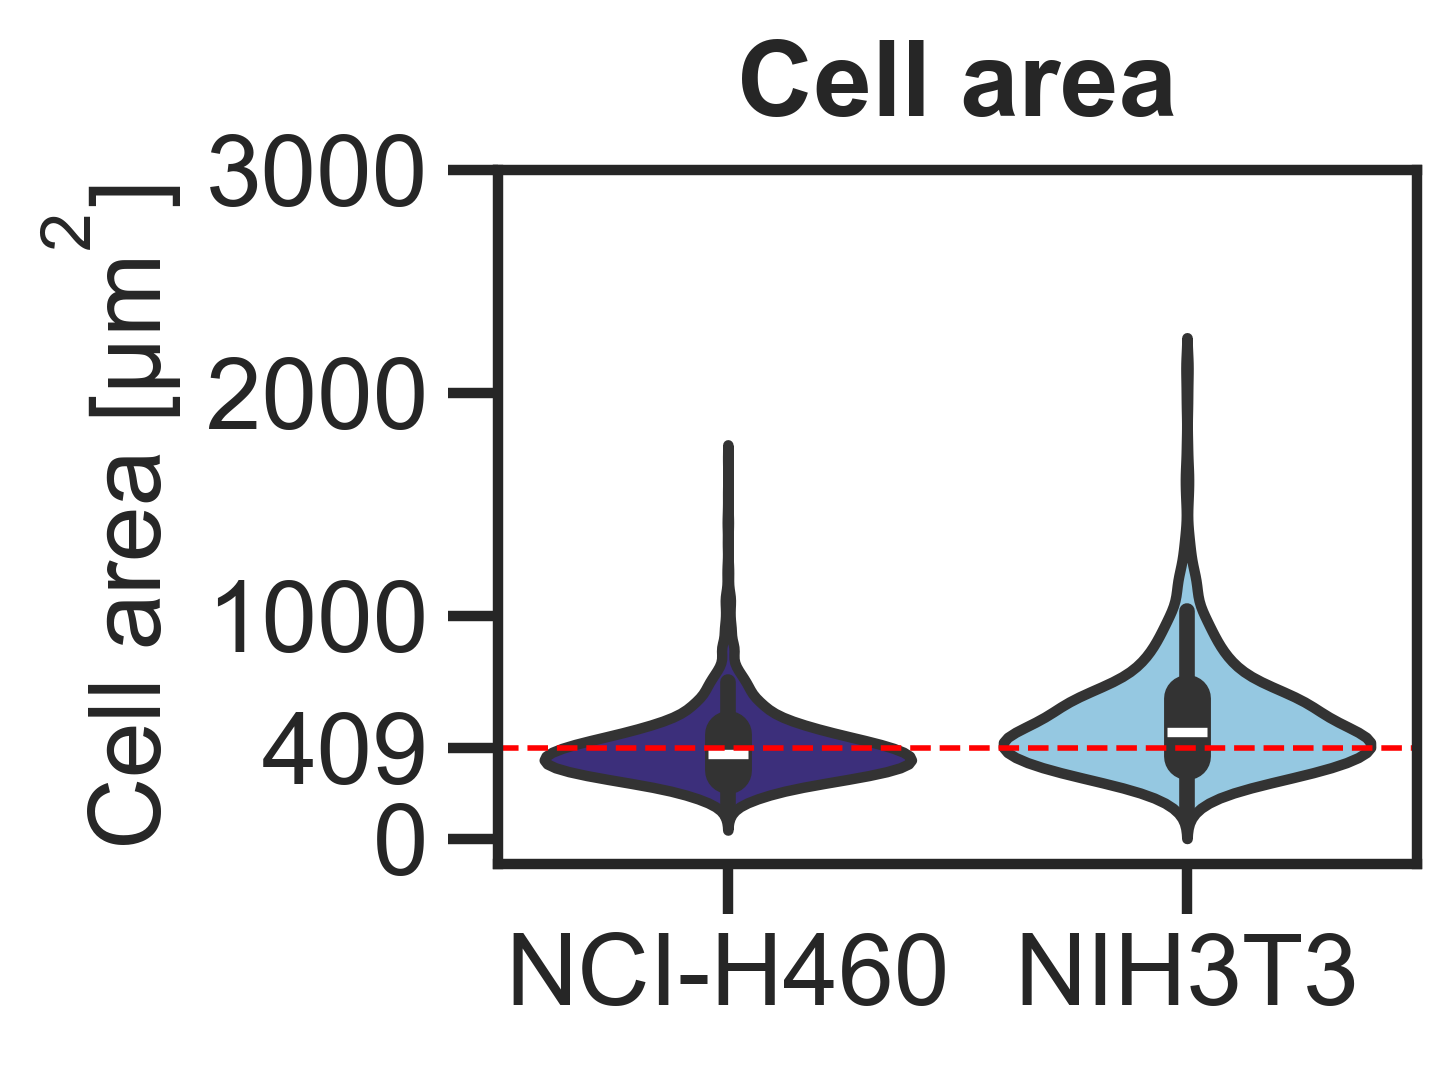

In [14]:
plt.figure(figsize=(4,3))
p = sns.violinplot(x='condition_GFP', 
                   y='cell_area_um2', 
                   data=adata.obs, 
                   hue='condition_GFP',
                   hue_order=['NCI-H460', 'NIH3T3'],
                   palette=palette[0:2], 
                   legend=False)

plt.ylabel(r'Cell area [$\mathregular{\mu m^2}$]')
plt.xlabel('')
plt.title('Cell area', size=19, ha='center', va='bottom', weight='bold')
plt.yticks([0,409,1000,2000,3000])  # custom tick positions
p.axhline(y=409, color='red', linestyle='--', lw=1)
p.tick_params(axis='both', labelsize=18)
plt.tight_layout()

plt.savefig(plots_path / 'panel_B_cellsize.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_B_cellsize.svg', bbox_inches='tight')

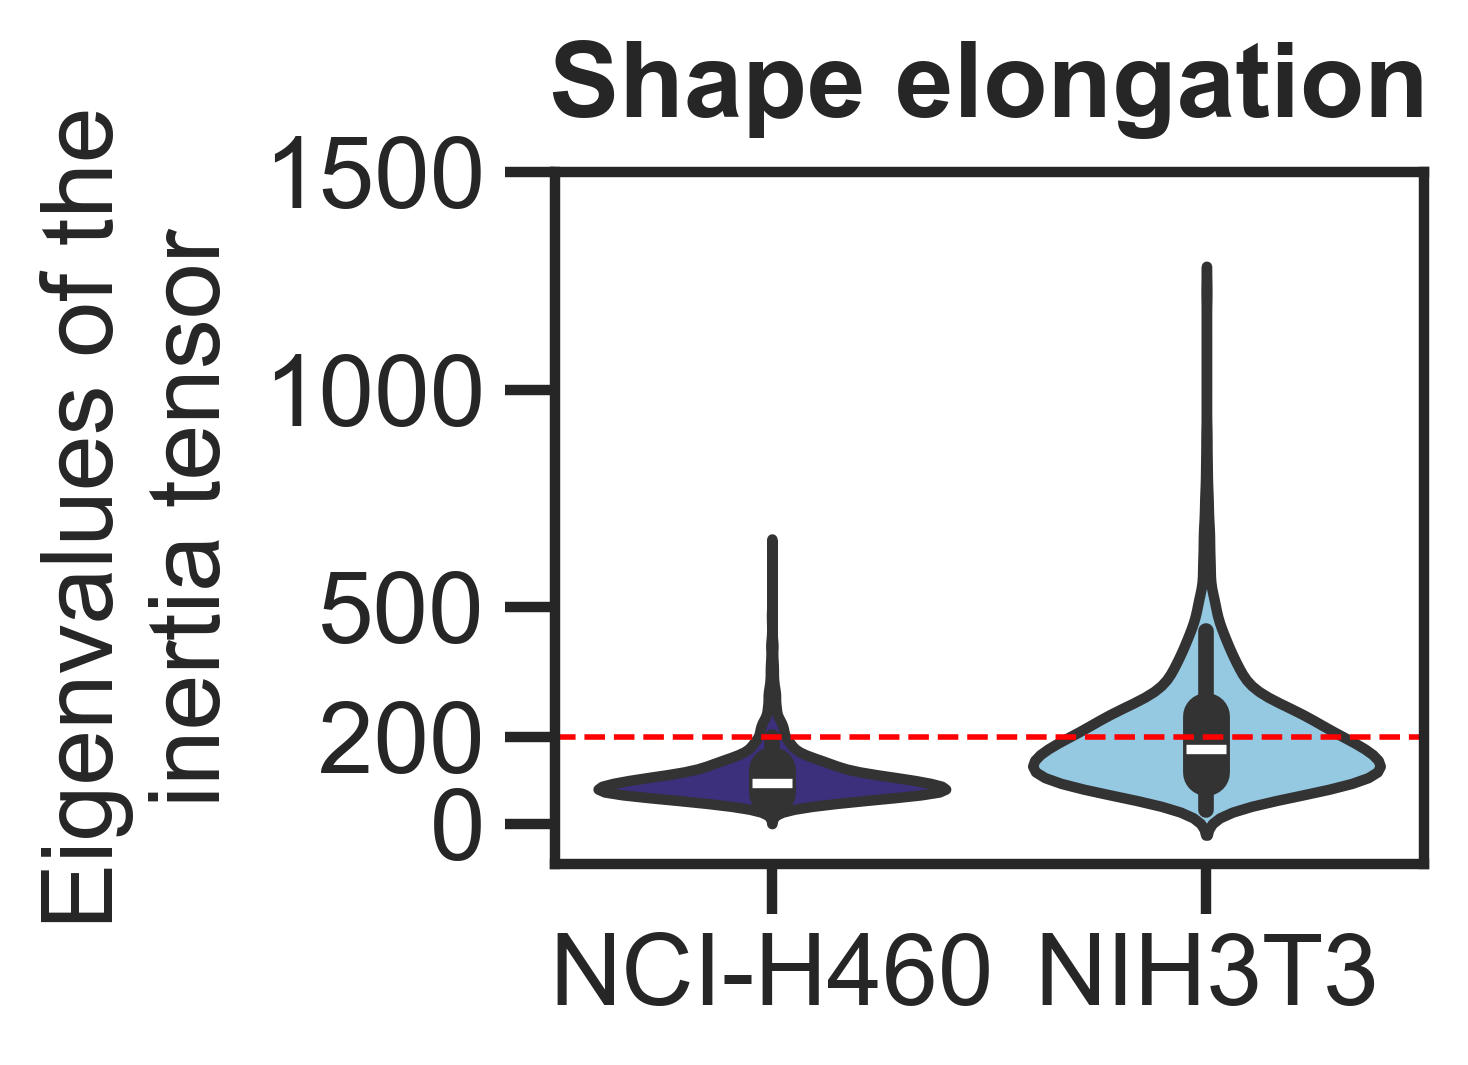

In [15]:
plt.figure(figsize=(4,3))
p = sns.violinplot(x='condition_GFP', 
                   y='inertia_tensor_eigvals-0', 
                   data=adata.obs, 
                   hue='condition_GFP',
                   hue_order=['NCI-H460', 'NIH3T3'],
                   palette=palette[0:2], 
                   legend=False)
p.axhline(y=200, color='red', linestyle='--', lw=1)
plt.ylabel(f'Eigenvalues of the\ninertia tensor')
plt.xlabel('')
plt.title('Shape elongation', size=19, ha='center', va='bottom', weight='bold')
plt.yticks([0,200, 500,1000,1500])  # custom tick positions
p.tick_params(axis='both', labelsize=18)
plt.tight_layout()

plt.savefig(plots_path / 'panel_B_shape.png', bbox_inches='tight')
plt.savefig(plots_path / 'panel_B_shape.svg', bbox_inches='tight')